<a href="https://colab.research.google.com/github/vidulaarumugam/Machine-learning_vidula/blob/main/ML_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
import io

from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import seaborn as sns


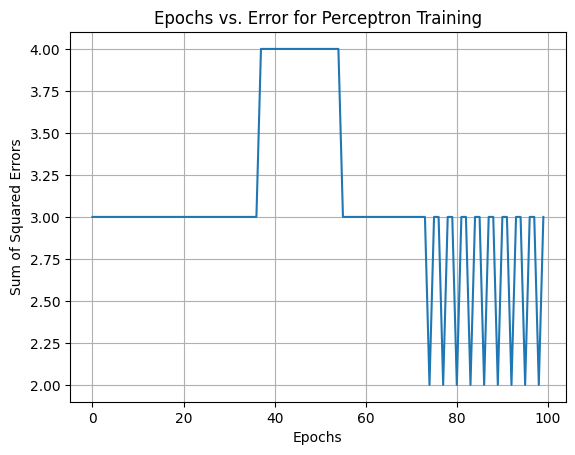

Final Weights: W0 = 0.8499999999999925, W1 = -0.75, W2 = -0.7999999999999998
Number of epochs needed for convergence: 100


In [8]:
#A1)
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05


# Input features (X0, X1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Target labels for AND gate
y = np.array([0, 0, 0, 1])
# Define the step activation function
def step_function(z):
    return 1 if z >= 0 else 0
error_values = []
epochs_list = []
epochs = 100
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]

        # Compute the predicted output
        prediction = step_function(weighted_sum)

        # Compute the error
        error = y[i] - prediction

        # Update the weights
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]

        total_error += error ** 2

    # Store error and epoch values
    error_values.append(total_error)
    epochs_list.append(epoch)

    # Check for convergence (error is zero)
    if total_error == 0:
        break

# Plot epochs against error values
plt.plot(epochs_list, error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Epochs vs. Error for Perceptron Training')
plt.grid(True)
plt.show()

# Print the final weights and number of epochs needed for convergence
print(f"Final Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")
print(f"Number of epochs needed for convergence: {len(epochs_list)}")


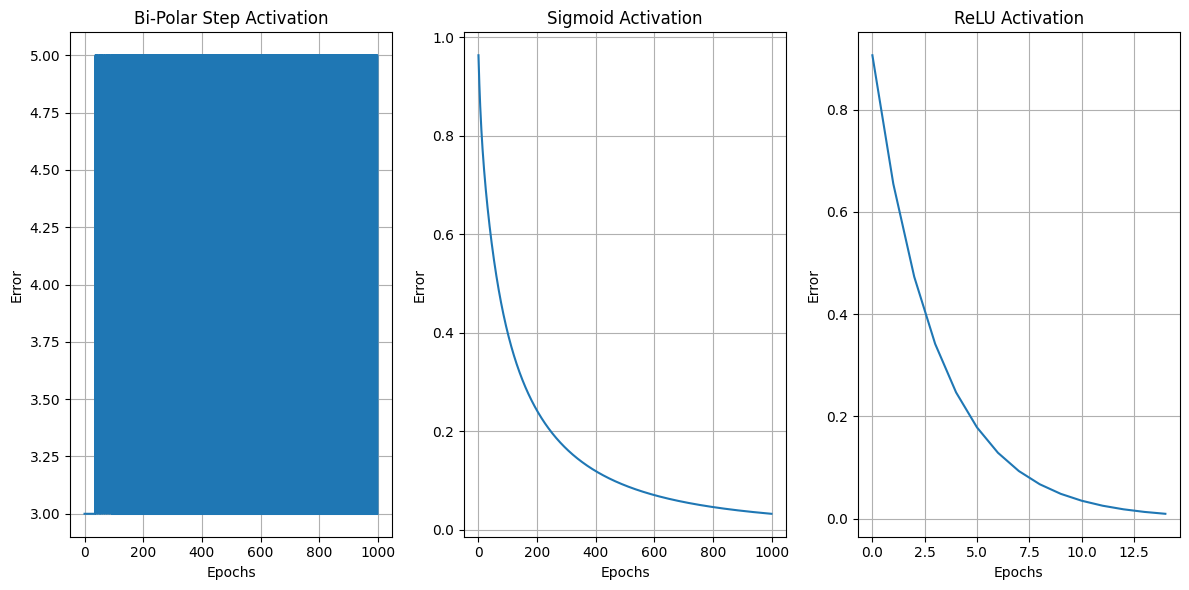

Number of epochs needed for convergence Bi-Polar Step Activation: 1000
Number of epochs needed for convergence Sigmoid Activation: 1000
Number of epochs needed for convergence ReLU Activation: 15


In [12]:
#A2)
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


y = np.array([0, 0, 0, 1])
error_values_step = []
error_values_sigmoid = []
error_values_relu = []
epochs_list = []


def bipolar_step_function(z):
    return -1 if z < 0 else 1


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))


def relu_function(z):
    return max(0, z)

# Training the perceptron with Bi-Polar Step activation

for epoch in range(1000):
    total_error = 0
    for i in range(len(X)):
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
        prediction = bipolar_step_function(weighted_sum)
        error = y[i] - prediction
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]
        total_error += abs(error)
    error_values_step.append(total_error)
    epochs_list.append(epoch)
    if total_error == 0:
        break

# Training the perceptron with Sigmoid activation

for epoch in range(1000):
    total_error = 0
    for i in range(len(X)):
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
        prediction = sigmoid_function(weighted_sum)
        error = y[i] - prediction
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]
        total_error += error ** 2
    error_values_sigmoid.append(total_error)
    if total_error < 0.01:
        break

# Training the perceptron with ReLU activation
for epoch in range(1000):
    total_error = 0
    for i in range(len(X)):
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
        prediction = relu_function(weighted_sum)
        error = y[i] - prediction
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]
        total_error += error ** 2
    error_values_relu.append(total_error)
    if total_error < 0.01:
        break

# Plot epochs against error values for each activation function
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(epochs_list, error_values_step)
plt.title('Bi-Polar Step Activation')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid(True)

plt.subplot(132)
plt.plot(range(len(error_values_sigmoid)), error_values_sigmoid)
plt.title('Sigmoid Activation')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid(True)

plt.subplot(133)
plt.plot(range(len(error_values_relu)), error_values_relu)
plt.title('ReLU Activation')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the number of epochs needed for convergence for each activation function
print(f"Number of epochs needed for convergence Bi-Polar Step Activation: {len(error_values_step)}")
print(f"Number of epochs needed for convergence Sigmoid Activation: {len(error_values_sigmoid)}")
print(f"Number of epochs needed for convergence ReLU Activation: {len(error_values_relu)}")


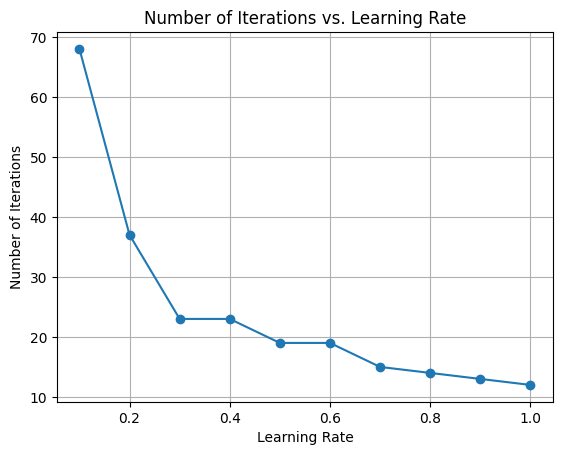

Learning Rate: 0.1, Iterations Needed: 68
Learning Rate: 0.2, Iterations Needed: 37
Learning Rate: 0.3, Iterations Needed: 23
Learning Rate: 0.4, Iterations Needed: 23
Learning Rate: 0.5, Iterations Needed: 19
Learning Rate: 0.6, Iterations Needed: 19
Learning Rate: 0.7, Iterations Needed: 15
Learning Rate: 0.8, Iterations Needed: 14
Learning Rate: 0.9, Iterations Needed: 13
Learning Rate: 1, Iterations Needed: 12


In [14]:
#A3)
W0 = 10
W1 = 0.2
W2 = -0.75

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Training data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
iterations_needed = []

# Training the perceptron for each learning rate
for learning_rate in learning_rates:
    W0 = 10
    W1 = 0.2
    W2 = -0.75

    for epoch in range(1000):
        total_error = 0
        for i in range(len(X)):
            weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
            prediction = 1 if weighted_sum >= 0 else 0
            error = y[i] - prediction
            W0 += learning_rate * error
            W1 += learning_rate * error * X[i][0]
            W2 += learning_rate * error * X[i][1]
            total_error += abs(error)
        if total_error == 0:
            iterations_needed.append(epoch + 1)
            break


plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs. Learning Rate')
plt.grid(True)
plt.show()

# Print the number of iterations needed for each learning rate
for i, lr in enumerate(learning_rates):
    print(f"Learning Rate: {lr}, Iterations Needed: {iterations_needed[i]}")


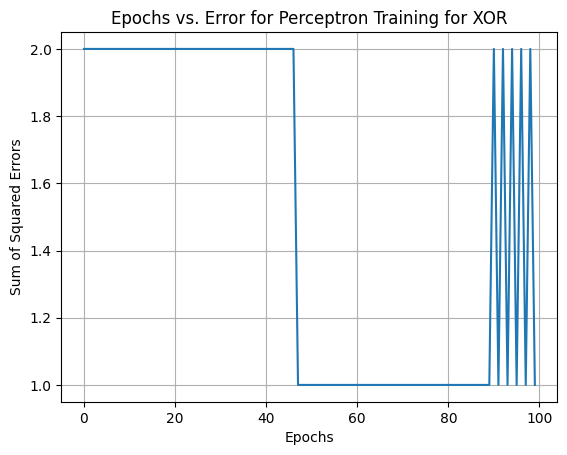

Final Weights: W0 = 2.8999999999999906, W1 = -2.1500000000000004, W2 = -2.849999999999998
Number of epochs needed for convergence: 100


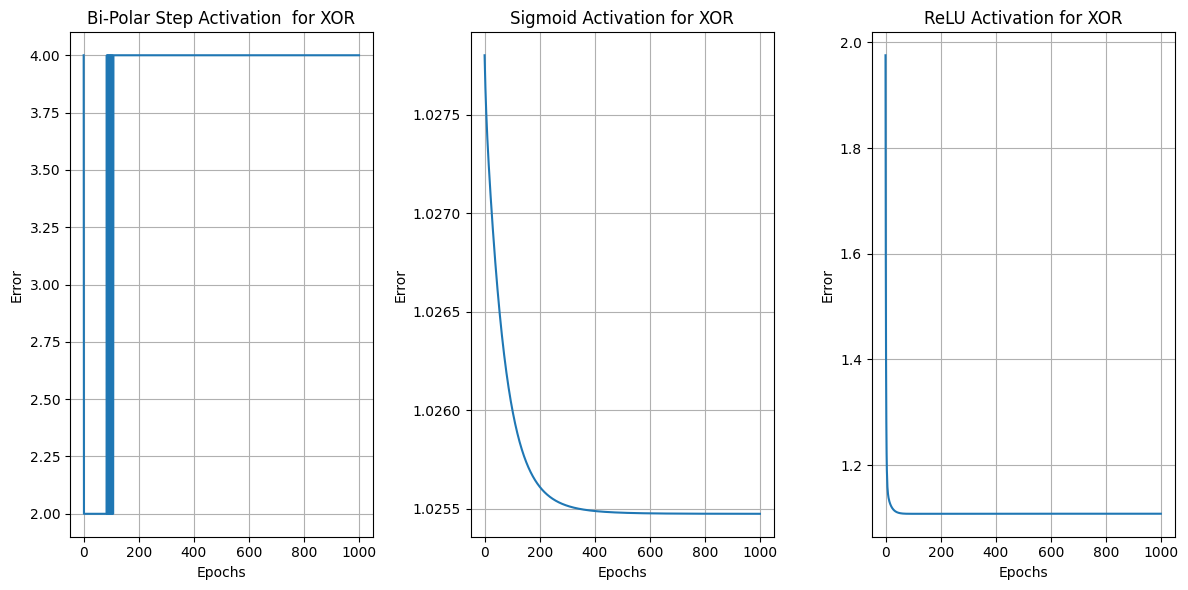

Number of epochs needed for convergence Bi-Polar Step Activation: 1000
Number of epochs needed for convergence Sigmoid Activation: 1000
Number of epochs needed for convergence ReLU Activation: 1000


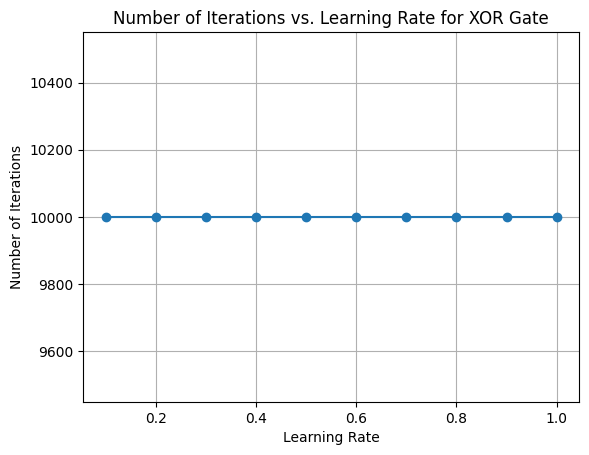

Learning Rate: 0.1, Iterations Needed: 10000
Learning Rate: 0.2, Iterations Needed: 10000
Learning Rate: 0.3, Iterations Needed: 10000
Learning Rate: 0.4, Iterations Needed: 10000
Learning Rate: 0.5, Iterations Needed: 10000
Learning Rate: 0.6, Iterations Needed: 10000
Learning Rate: 0.7, Iterations Needed: 10000
Learning Rate: 0.8, Iterations Needed: 10000
Learning Rate: 0.9, Iterations Needed: 10000
Learning Rate: 1, Iterations Needed: 10000


In [21]:
#A4)XOR
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05


# Input features (X0, X1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Target labels for AND gate
y = np.array([0, 1, 1, 0])
# Define the step activation function
def step_function(z):
    return 1 if z >= 0 else 0
error_values = []
epochs_list = []
epochs = 100
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]

        # Compute the predicted output
        prediction = step_function(weighted_sum)

        # Compute the error
        error = y[i] - prediction

        # Update the weights
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]

        total_error += error ** 2

    # Store error and epoch values
    error_values.append(total_error)
    epochs_list.append(epoch)

    # Check for convergence (error is zero)
    if total_error == 0:
        break

# Plot epochs against error values
plt.plot(epochs_list, error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Epochs vs. Error for Perceptron Training for XOR')
plt.grid(True)
plt.show()

# Print the final weights and number of epochs needed for convergence
print(f"Final Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")
print(f"Number of epochs needed for convergence: {len(epochs_list)}")


#different activation records
error_values_step = []
error_values_sigmoid = []
error_values_relu = []
epochs_list = []


def bipolar_step_function(z):
    return -1 if z < 0 else 1


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))


def relu_function(z):
    return max(0, z)

# Training the perceptron with Bi-Polar Step activation

for epoch in range(1000):
    total_error = 0
    for i in range(len(X)):
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
        prediction = bipolar_step_function(weighted_sum)
        error = y[i] - prediction
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]
        total_error += abs(error)
    error_values_step.append(total_error)
    epochs_list.append(epoch)
    if total_error == 0:
        break

# Training the perceptron with Sigmoid activation

for epoch in range(1000):
    total_error = 0
    for i in range(len(X)):
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
        prediction = sigmoid_function(weighted_sum)
        error = y[i] - prediction
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]
        total_error += error ** 2
    error_values_sigmoid.append(total_error)
    if total_error < 0.01:
        break

# Training the perceptron with ReLU activation
for epoch in range(1000):
    total_error = 0
    for i in range(len(X)):
        weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
        prediction = relu_function(weighted_sum)
        error = y[i] - prediction
        W0 += learning_rate * error
        W1 += learning_rate * error * X[i][0]
        W2 += learning_rate * error * X[i][1]
        total_error += error ** 2
    error_values_relu.append(total_error)
    if total_error < 0.01:
        break

# Plot epochs against error values for each activation function
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(epochs_list, error_values_step)
plt.title('Bi-Polar Step Activation  for XOR')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid(True)

plt.subplot(132)
plt.plot(range(len(error_values_sigmoid)), error_values_sigmoid)
plt.title('Sigmoid Activation for XOR')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid(True)

plt.subplot(133)
plt.plot(range(len(error_values_relu)), error_values_relu)
plt.title('ReLU Activation for XOR')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the number of epochs needed for convergence for each activation function
print(f"Number of epochs needed for convergence Bi-Polar Step Activation: {len(error_values_step)}")
print(f"Number of epochs needed for convergence Sigmoid Activation: {len(error_values_sigmoid)}")
print(f"Number of epochs needed for convergence ReLU Activation: {len(error_values_relu)}")





# List of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


# List to store the number of iterations for each learning rate
iterations_needed = []

# Maximum number of epochs to avoid infinite loops
max_epochs = 10000

# Training the perceptron for each learning rate
for learning_rate in learning_rates:
    # Initialize weights
    W0 = 10
    W1 = 0.2
    W2 = -0.75

    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            weighted_sum = W0 + W1 * X[i][0] + W2 * X[i][1]
            prediction = 1 if weighted_sum >= 0 else 0
            error = y[i] - prediction
            W0 += learning_rate * error
            W1 += learning_rate * error * X[i][0]
            W2 += learning_rate * error * X[i][1]
            total_error += abs(error)
        if total_error == 0:
            iterations_needed.append(epoch + 1)
            break
    else:
        # If max_epochs is reached, add a large value to indicate no convergence
        iterations_needed.append(max_epochs)

# Plot learning rates against the number of iterations needed for convergence
plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs. Learning Rate for XOR Gate')
plt.grid(True)
plt.show()

# Print the number of iterations needed for each learning rate
for i, lr in enumerate(learning_rates):
    print(f"Learning Rate: {lr}, Iterations Needed: {iterations_needed[i]}")



Epoch 0: Total Error = 10.0
Epoch 100: Total Error = 10.0
Epoch 200: Total Error = 10.0
Epoch 300: Total Error = 10.0
Epoch 400: Total Error = 10.0
Epoch 500: Total Error = 10.0
Epoch 600: Total Error = 10.0
Epoch 700: Total Error = 10.0
Epoch 800: Total Error = 10.0
Epoch 900: Total Error = 10.0
Final weights:
[0.1, 0.2, 0.3, 0.4]
Final bias:
0.5


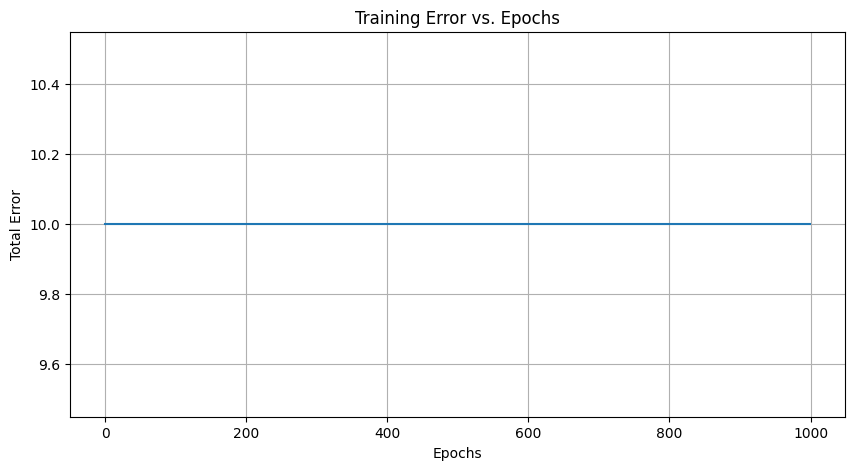

In [29]:
import numpy as np

# Customer Data
data = ([
    [20, 6,2,386],
    [16,3,6,289],
    [27,6,2,393],
    [19,1,2,110],
    [24,4,2,280],
    [22,1,5,167],
    [15,4,2,271],
    [18,4,2,274],
    [21,1,4,148],
    [16,2,4,198]
])

# Labels (High Value Tx?)
labels = [0, 0, 0, 1, 0, 1, 0, 0,1,1]  # 0 for Low, 1 for High

w = [0.1, 0.2, 0.3, 0.4]  # Weights for Candies, Mangoes, Milk Packets, Payment
b = 0.5


# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Learning rate and number of epochs
learning_rate = 0.01
epochs = 1000
errors = []

for epoch in range(epochs):
    total_error = 0
    for i in range(len(data)):
        features = data[i][:4]
        label = 1 if data[i][-1] == "Yes" else 0

        # Calculate the predicted output
        z = sum([w[j] * features[j] for j in range(len(features))]) + b
        predicted_output = sigmoid(z)

        # Calculate the error
        error = label - predicted_output
        total_error += abs(error)

        # Update weights and bias using gradient descent
        for j in range(len(features)):
            w[j] += learning_rate * error * predicted_output * (1 - predicted_output) * features[j]
        b += learning_rate * error * predicted_output * (1 - predicted_output)

    errors.append(total_error)
    # Print the total error for this epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Total Error = {total_error}")

# Final weights and bias
print("Final weights:")
print(w)
print("Final bias:")
print(b)

plt.figure(figsize=(10, 5))
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Training Error vs. Epochs')
plt.grid(True)
plt.show()



In [35]:
import numpy as np
import numpy as np

# Initialize weights and learning rate
w1 = 0.1
w2 = 0.2
w3 = 0.3
w4 = 0.4
α = 0.01

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the perceptron function
def perceptron(input_data, weights):
    weighted_sum = np.dot(input_data, weights)
    output = sigmoid(weighted_sum)
    return output

# Define the threshold for classification
threshold = 0.5

# Customer data
data = np.array([
    [20, 6, 2,386, 1],   # High Value
    [16, 3,6, 289, 1],  # High Value
    [27, 6,2, 393, 1],  # High Value
    [19, 1,2, 110, 0],   # Low Value
    [24, 4,2, 280, 1],  # High Value
    [22, 1,5, 167, 0],  # Low Value
    [15, 4,2, 271, 1],  # High Value
    [18, 4,2, 274, 1],  # High Value
    [21, 1,4, 148, 0],  # Low Value
    [16, 2,4, 198, 0]   # Low Value
])

# Extract features and labels
X = data[:, :-1]  # Features
y = data[:, -1]   # Labels

# Normalize features (optional, but can help with convergence)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Training the perceptron
num_epochs = 1000

for epoch in range(num_epochs):
    for i in range(len(X)):
        # Compute the predicted output
        output = perceptron(X[i], [w1, w2, w3, w4])

        # Compute the error
        error = y[i] - output

        # Update weights using gradient descent
        w1 += α * error * X[i][0] * output * (1 - output)
        w2 += α * error * X[i][1] * output * (1 - output)
        w3 += α * error * X[i][2] * output * (1 - output)
        w4 += α * error * X[i][3] * output * (1 - output)

# Final weights
print("Final Weights:", [w1, w2, w3, w4])






Final Weights: [-0.3808805750922419, 1.5693542329917152, -0.014891670707379442, 1.8151875470085927]


In [37]:
#A6) pseudo matrix
# Extract features and labels
X = np.array([row[:4] for row in data])
y = np.array([row[4] for row in data])

# Add a column of ones to X for bias
X_with_bias = np.column_stack((np.ones(len(X)), X))

# Calculate the weight vector and bias using the pseudo-inverse method
w = np.dot(np.linalg.pinv(X_with_bias), y)

# Extract the bias and weights
bias = w[0]
weights = w[1:]

# Print the results
print("Weights:", weights)
print("Bias:", bias)






Weights: [-0.02789923  0.01473739 -0.04323249  0.00447248]
Bias: 0.11399029784150344


In [6]:
# A7) AND gate backpropagation algorithm
v10,v20 = 0.1,0.04 # Biases
v11,v12,v21,v22 = 0.2,-0.75,10,0.09 # input layer weights
w0,w1,w2 = 0.2,0.4,0.6 # output layer weights
learning_rate = 0.05

x1 = [0,0,1,1]
x2 = [0,1,0,1]
bias = [1,1,1,1]
output = [0,0,0,1]
target_out = 0
h1,h2 = 0,0 # hidden layer units
target_out1, target_out2 = 0, 0
e_count = 0
while (e_count < 1000):
    print("Epoch: ",e_count+1)
    for i in range(0,len(bias)):
        h1 = bias[i] * v10 + x1[i] * v11 + x2[i] * v21
        h2 = bias[i] * v20 + x1[i] * v12 + x2[i] * v22
        target_out1 = 1/(1+ np.exp(-h1))
        target_out2 = 1/(1+ np.exp(-h2))
        target_out = 1/(1+ np.exp(-(w0 + target_out1 * w1 + target_out2 * w2)))
        if (target_out == output[i]):
            print("bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",target_out1,"\n""h2 unit = ",target_out)
            continue
        else:
            derivative = target_out*(1 - target_out)
            deltak = derivative*(- target_out + output[i])
            deltah1 = target_out1*(1-target_out1)*(w1)*deltak
            deltah2 = target_out2*(1-target_out2)*(w2)*deltak
            w0 = w0 + learning_rate * deltak * 1
            w1 = w1 + learning_rate * deltak * target_out1
            w2 = w2 + learning_rate * deltak * target_out2
            v10,v20 = (v10 + learning_rate*deltah1*bias[i]),(v20 + learning_rate*deltah2*bias[i])
            v11,v12,v21,v22 = (v11 + learning_rate*deltah1*x1[i]),(v12 + learning_rate*deltah2*x1[i]),(v21 + learning_rate*deltah1*x1[i]),(v22 + learning_rate*deltah2*x1[i])
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",target_out1,"\n""h2 unit = ",target_out)
    e_count = e_count + 1
    if abs(target_out - output[i]) < 0.002:
        print("The error is ",abs(target_out - output[i]))
        break
    else:
        continue


Streaming output truncated to the last 5000 lines.
Epoch:  801

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.42922399857919985 
h2 unit =  0.213386046915461

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.9999259594015338 
h2 unit =  0.33821544866214454

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.4282052766136226 
h2 unit =  0.24508199311843307

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9999255546468849 
h2 unit =  0.3774071827213183
Epoch:  802

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.42896658444304947 
h2 unit =  0.2132372078429904

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.9999258381573155 
h2 unit =  0.3383547064613558

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.4278046781212367 
h2 unit =  0.24498020238192952

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.999925388980438 
h2 unit =  0.37765501363288556
Epoch:  803

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.42870906186933094 
h2 unit =  0.21308813502753107

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.9999257166372608 
h2 unit =  0.33849394082603

In [7]:
#A8)XOR
v10,v20 = 0.1,0.04 # Biases
v11,v12,v21,v22 = 0.2,-0.75,10,0.09 # input layer weights
w0,w1,w2 = 0.2,0.4,0.6 # output layer weights
learning_rate = 0.05

x1 = [0,0,1,1]
x2 = [0,1,0,1]
bias = [1,1,1,1]
output = [0,1,1,0]
target_out = 0
h1,h2 = 0,0 # hidden layer units
target_out1, target_out2 = 0, 0
e_count = 0
while (e_count < 1000):
    print("Epoch: ",e_count+1)
    for i in range(0,len(bias)):
        h1 = bias[i] * v10 + x1[i] * v11 + x2[i] * v21
        h2 = bias[i] * v20 + x1[i] * v12 + x2[i] * v22
        target_out1 = 1/(1+ np.exp(-h1))
        target_out2 = 1/(1+ np.exp(-h2))
        target_out = 1/(1+ np.exp(-(w0 + target_out1 * w1 + target_out2 * w2)))
        if (target_out == output[i]):
            print("bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",target_out1,"\n""h2 unit = ",target_out)
            continue
        else:
            derivative = target_out*(1 - target_out)
            deltak = derivative*(- target_out + output[i])
            deltah1 = target_out1*(1-target_out1)*(w1)*deltak
            deltah2 = target_out2*(1-target_out2)*(w2)*deltak
            w0 = w0 + learning_rate * deltak * 1
            w1 = w1 + learning_rate * deltak * target_out1
            w2 = w2 + learning_rate * deltak * target_out2
            v10,v20 = (v10 + learning_rate*deltah1*bias[i]),(v20 + learning_rate*deltah2*bias[i])
            v11,v12,v21,v22 = (v11 + learning_rate*deltah1*x1[i]),(v12 + learning_rate*deltah2*x1[i]),(v21 + learning_rate*deltah1*x1[i]),(v22 + learning_rate*deltah2*x1[i])
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",target_out1,"\n""h2 unit = ",target_out)
    e_count = e_count + 1
    if abs(target_out - output[i]) < 0.002:
        print("The error is ",abs(target_out - output[i]))
        break
    else:
        continue


Streaming output truncated to the last 5000 lines.
Epoch:  801

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.5224250972960369 
h2 unit =  0.4938920902358523

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.9999663554887597 
h2 unit =  0.5233532148166705

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.6223716788887838 
h2 unit =  0.48441708369007663

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.999977703908631 
h2 unit =  0.5130369513190077
Epoch:  802

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.5224243955822936 
h2 unit =  0.4938713695634041

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.9999663686688319 
h2 unit =  0.5233700536180617

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.6224637655773039 
h2 unit =  0.4844148123985458

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9999777214771974 
h2 unit =  0.5130582816247594
Epoch:  803

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.5224236869022855 
h2 unit =  0.4938506301302175

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.9999663818577815 
h2 unit =  0.5233869062870224

bi

In [12]:
#A9)
v10,v20 = 0.01,0.4
v11,v12,v21,v22 = 10,0.2,-0.75,0.09 # input layer weights
w10,w20 = 0.11,0.41
w11,w12,w21,w22 = -20,0.1,-1.2,0.7 # output layer weights
learning_rate = 0.05
# input vectors
bias = [1,1,1,1]
x1 = [0,0,1,1]
x2 = [0,1,0,1]
# output vectors [x1 AND x2]
output_actual = [1,0,0,1]
output_actual1 = [0,1,1,0]
output_actual2 = [1,0,0,1]
output_predicted = 0
# hidden layer units
h1,h2 = 0,0
output_predicted1, output_predicted2 = 0, 0
iterations=0
while (iterations < 2500):
    print("Epoch",iterations+1)
    for i in range(0,len(bias)):
        h1 = bias[i] * v10 + x1[i] * v11 + x2[i] * v21
        h2 = bias[i] * v20 + x1[i] * v12 + x2[i] * v22
        output_predicted1 = 1/(1+ np.exp(-h1))
        output_predicted2 = 1/(1+ np.exp(-h2))
        output_predicted01 = 1/(1+ np.exp(-(w10 + output_predicted1 * w11 + output_predicted2 * w21)))
        output_predicted02 = 1/(1+ np.exp(-(w20 + output_predicted1 * w12 + output_predicted2 * w22)))
        if (output_predicted01 == output_actual[i]):
            print("The Output 1: ")
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 = ",output_predicted1,"\n""h2 = ",output_predicted2)
            continue
        else:
            derivative = output_predicted01*(1-output_predicted01)
            deltak = derivative*(-output_predicted01 + output_actual1[i])
            deltah1 = output_predicted1*(1-output_predicted1)*(w11)*deltak
            deltah2 = output_predicted2*(1-output_predicted2)*(w21)*deltak
            w10 = w10 + learning_rate * deltak * 1
            w11 = w11 + learning_rate * deltak * output_predicted1
            w12 = w21 + learning_rate * deltak * output_predicted2
            v10,v20 = (v10 + learning_rate*deltah1*bias[i]),(v20 + learning_rate*deltah2*bias[i])
            v11,v12,v21,v22 = (v11 + learning_rate*deltah1*x1[i]),(v12 + learning_rate*deltah2*x1[i]),(v21 + learning_rate*deltah1*x1[i]),(v22 + learning_rate*deltah2*x1[i])
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",output_predicted1,"\n""h2 unit=",output_predicted2)
        if (output_predicted02 == output_actual[i]):
            print("The Output 2: ")
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 = ",output_predicted1,"\n""h2 = ",output_predicted2)
            continue
        else:
            derivative = output_predicted02*(1-output_predicted02)
            deltak = derivative*(-output_predicted02 + output_actual2[i])
            deltah1 = output_predicted1*(1-output_predicted1)*(w12)*deltak
            deltah2 = output_predicted2*(1-output_predicted2)*(w22)*deltak
            w20 = w20 + learning_rate * deltak * 1
            w21 = w21 + learning_rate * deltak * output_predicted1
            w22 = w22 + learning_rate * deltak * output_predicted2
            v10,v20 = (v10 + learning_rate*deltah1*bias[i]),(v20 + learning_rate*deltah2*bias[i])
            v11,v12,v21,v22 = (v11 + learning_rate*deltah1*x1[i]),(v12 + learning_rate*deltah2*x1[i]),(v21 + learning_rate*deltah1*x1[i]),(v22 + learning_rate*deltah2*x1[i])
            print("\n""bias = ",bias[i],"\n""x1 = ",x1[i],"\n""x2 = ",x2[i],"\n""h1 unit = ",output_predicted1,"\n""h2 unit =",output_predicted2)

    iterations=iterations+1
    if abs(output_predicted01 - output_actual1[i]) < 0.002 and abs(output_predicted02 - output_actual2[i]) < 0.002:
        print("The error is ",abs( output_predicted02 - output_actual2[i]),abs( output_predicted01 - output_actual1[i]))
        break
    else:
        continue

Streaming output truncated to the last 5000 lines.
h1 unit =  0.9996495800605508 
h2 unit = 0.6428848815820831
Epoch 2399

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.21517006498864732 
h2 unit= 0.5850810122276242

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.21517006498864732 
h2 unit = 0.5850810122276242

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.11540175502720335 
h2 unit= 0.6014716414820487

bias =  1 
x1 =  0 
x2 =  1 
h1 unit =  0.11540175502720335 
h2 unit = 0.6014716414820487

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.9998345119226469 
h2 unit= 0.6274746241295023

bias =  1 
x1 =  1 
x2 =  0 
h1 unit =  0.9998345119226469 
h2 unit = 0.6274746241295023

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9996497380505343 
h2 unit= 0.6428739559206743

bias =  1 
x1 =  1 
x2 =  1 
h1 unit =  0.9996497380505343 
h2 unit = 0.6428739559206743
Epoch 2400

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.2152461887816799 
h2 unit= 0.585092300320176

bias =  1 
x1 =  0 
x2 =  0 
h1 unit =  0.2152461887816799

In [18]:
#A10)
# AND Gate
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]
clf0 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2, ), random_state=1)
clf0.fit(x, y)
print(clf0.score(x, y))
clf0.predict([[0,0],[1,1]])

# XOR Gate
x1 = [[0, 0], [0, 1], [1, 0], [1, 1]]
y1 = [0, 1, 1, 0]
clf1 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2, ), random_state=1)
clf1.fit(x1, y1)
print(clf1.score(x, y))
clf1.predict([[0,0],[1,1]])



1.0
0.75


array([0, 1])

In [21]:
#A11)
from google.colab import files
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['t5_train (1).xlsx']))


plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
x = df.iloc[:, 11:13].values
y = df.iloc[:, [5,6]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
projectMLP = MLPRegressor(solver='lbfgs', activation='logistic', hidden_layer_sizes=(4,), random_state=1)
projectMLP.fit(x_train, y_train)
print(projectMLP.score(x_test, y_test))
projectMLP.predict(x_test)

Saving t5_train (1).xlsx to t5_train (1).xlsx
-0.011552949670653068


array([[-0.01561426,  0.01078679],
       [-0.01567114,  0.01039175],
       [-0.01717604,  0.01115257],
       [-0.01679784,  0.00987615],
       [-0.0164399 ,  0.01061181],
       [-0.01575541,  0.01076251],
       [-0.01570588,  0.01041459],
       [-0.01575382,  0.01044683],
       [-0.01705535,  0.01033334],
       [-0.01529214,  0.01085763],
       [-0.01482178,  0.01052441],
       [-0.01516865,  0.01005447],
       [-0.01559878,  0.0111596 ],
       [-0.01615407,  0.01105933],
       [-0.01783376,  0.00948376],
       [-0.01551513,  0.00987928],
       [-0.01745431,  0.01001245],
       [-0.01542941,  0.01041459],
       [-0.0151424 ,  0.01115691],
       [-0.01580923,  0.01129438],
       [-0.01752828,  0.00970679],
       [-0.01539591,  0.01058432],
       [-0.01530135,  0.01026782],
       [-0.01769847,  0.00912677],
       [-0.01469492,  0.01096972],
       [-0.01600986,  0.01002663],
       [-0.01658193,  0.01066128],
       [-0.01616885,  0.01081292],
       [-0.01681932,